
# <span style="color:rgb(213,80,0)">Fish data.</span>

This file creates Figures 7.16\-7.19.

## Beginning of code.

In [1]:
clear
close all
prin=0;
load fish.mat

% pike is removed and just 3 variables are used
sel=categorical(fish{:,1})~='Pike';
y=fish{sel,2};
X=fish{sel,3:5};

## Prepare input for Figure 7.16 and Figure 7.17

automatic model selection (a monotonicity constraint on the transformation of the regressors is imposed)


In [2]:
[VALtfin,corMatrix]=avasms(y,X,'l',3*ones(size(X,2),1),'plots',0);
disp('Value of R2 for the first solution')

Value of R2 for the first solution

In [3]:
disp(VALtfin.R2(1))

    0.9829

## Create Figure 7.16 and 7.17


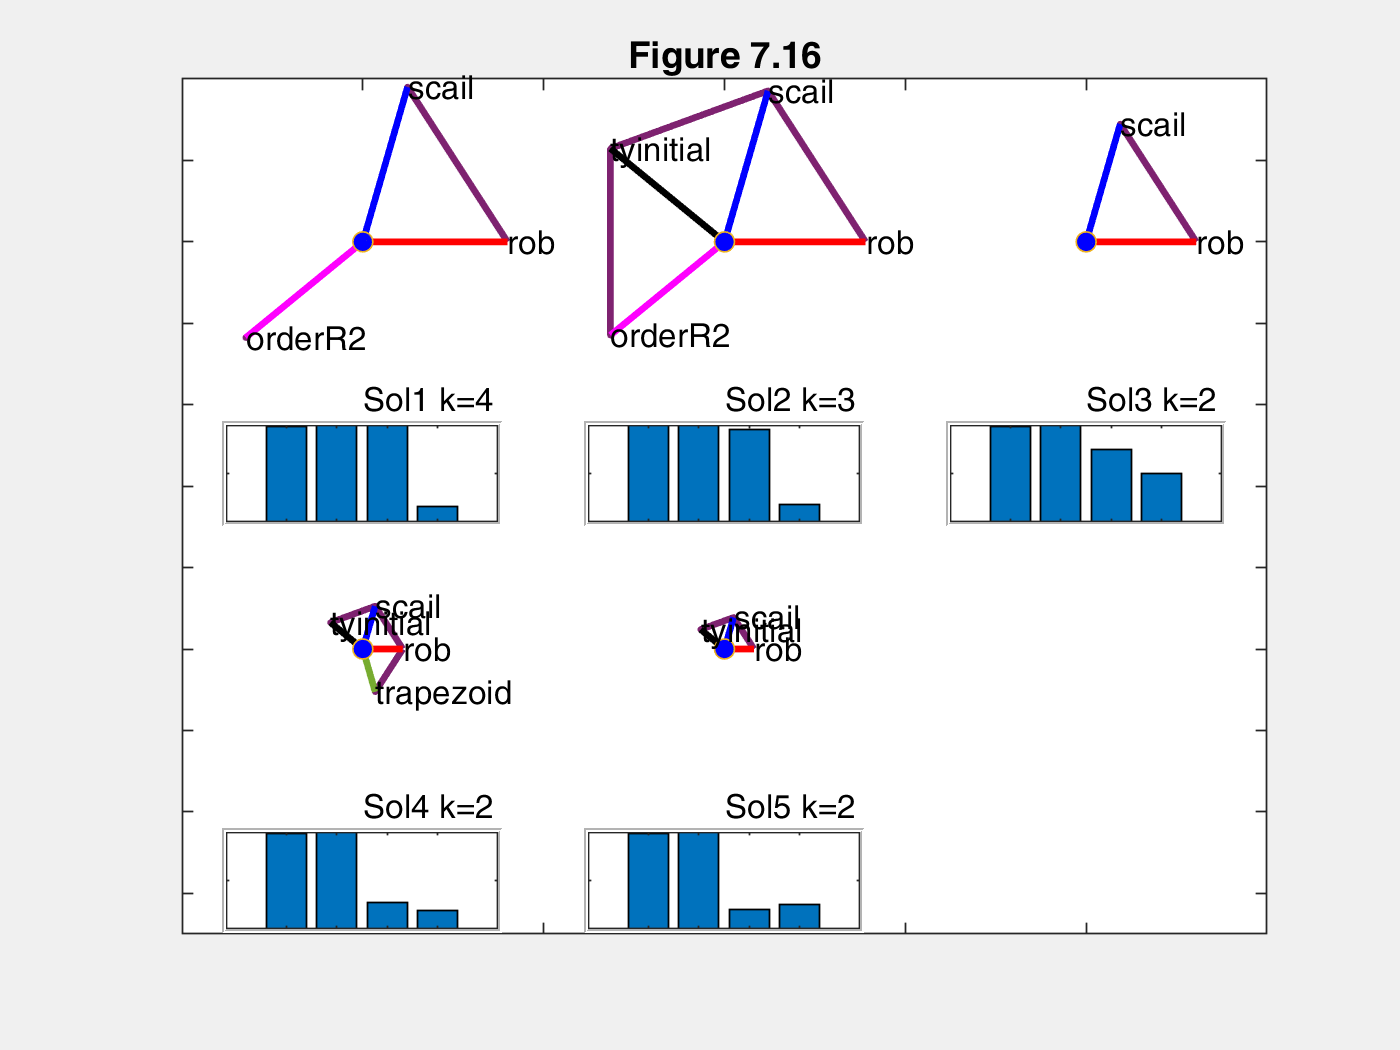

In [4]:
BigAx=avasmsplot(VALtfin,'showBars',true,'corMatrix',corMatrix);

pl_augstarplot=findobj(0, 'type', 'figure','tag','pl_augstarplot');
figure(pl_augstarplot(1))
title(BigAx,'Figure 7.16')
set(gcf,"Name",'Figure 7.16')


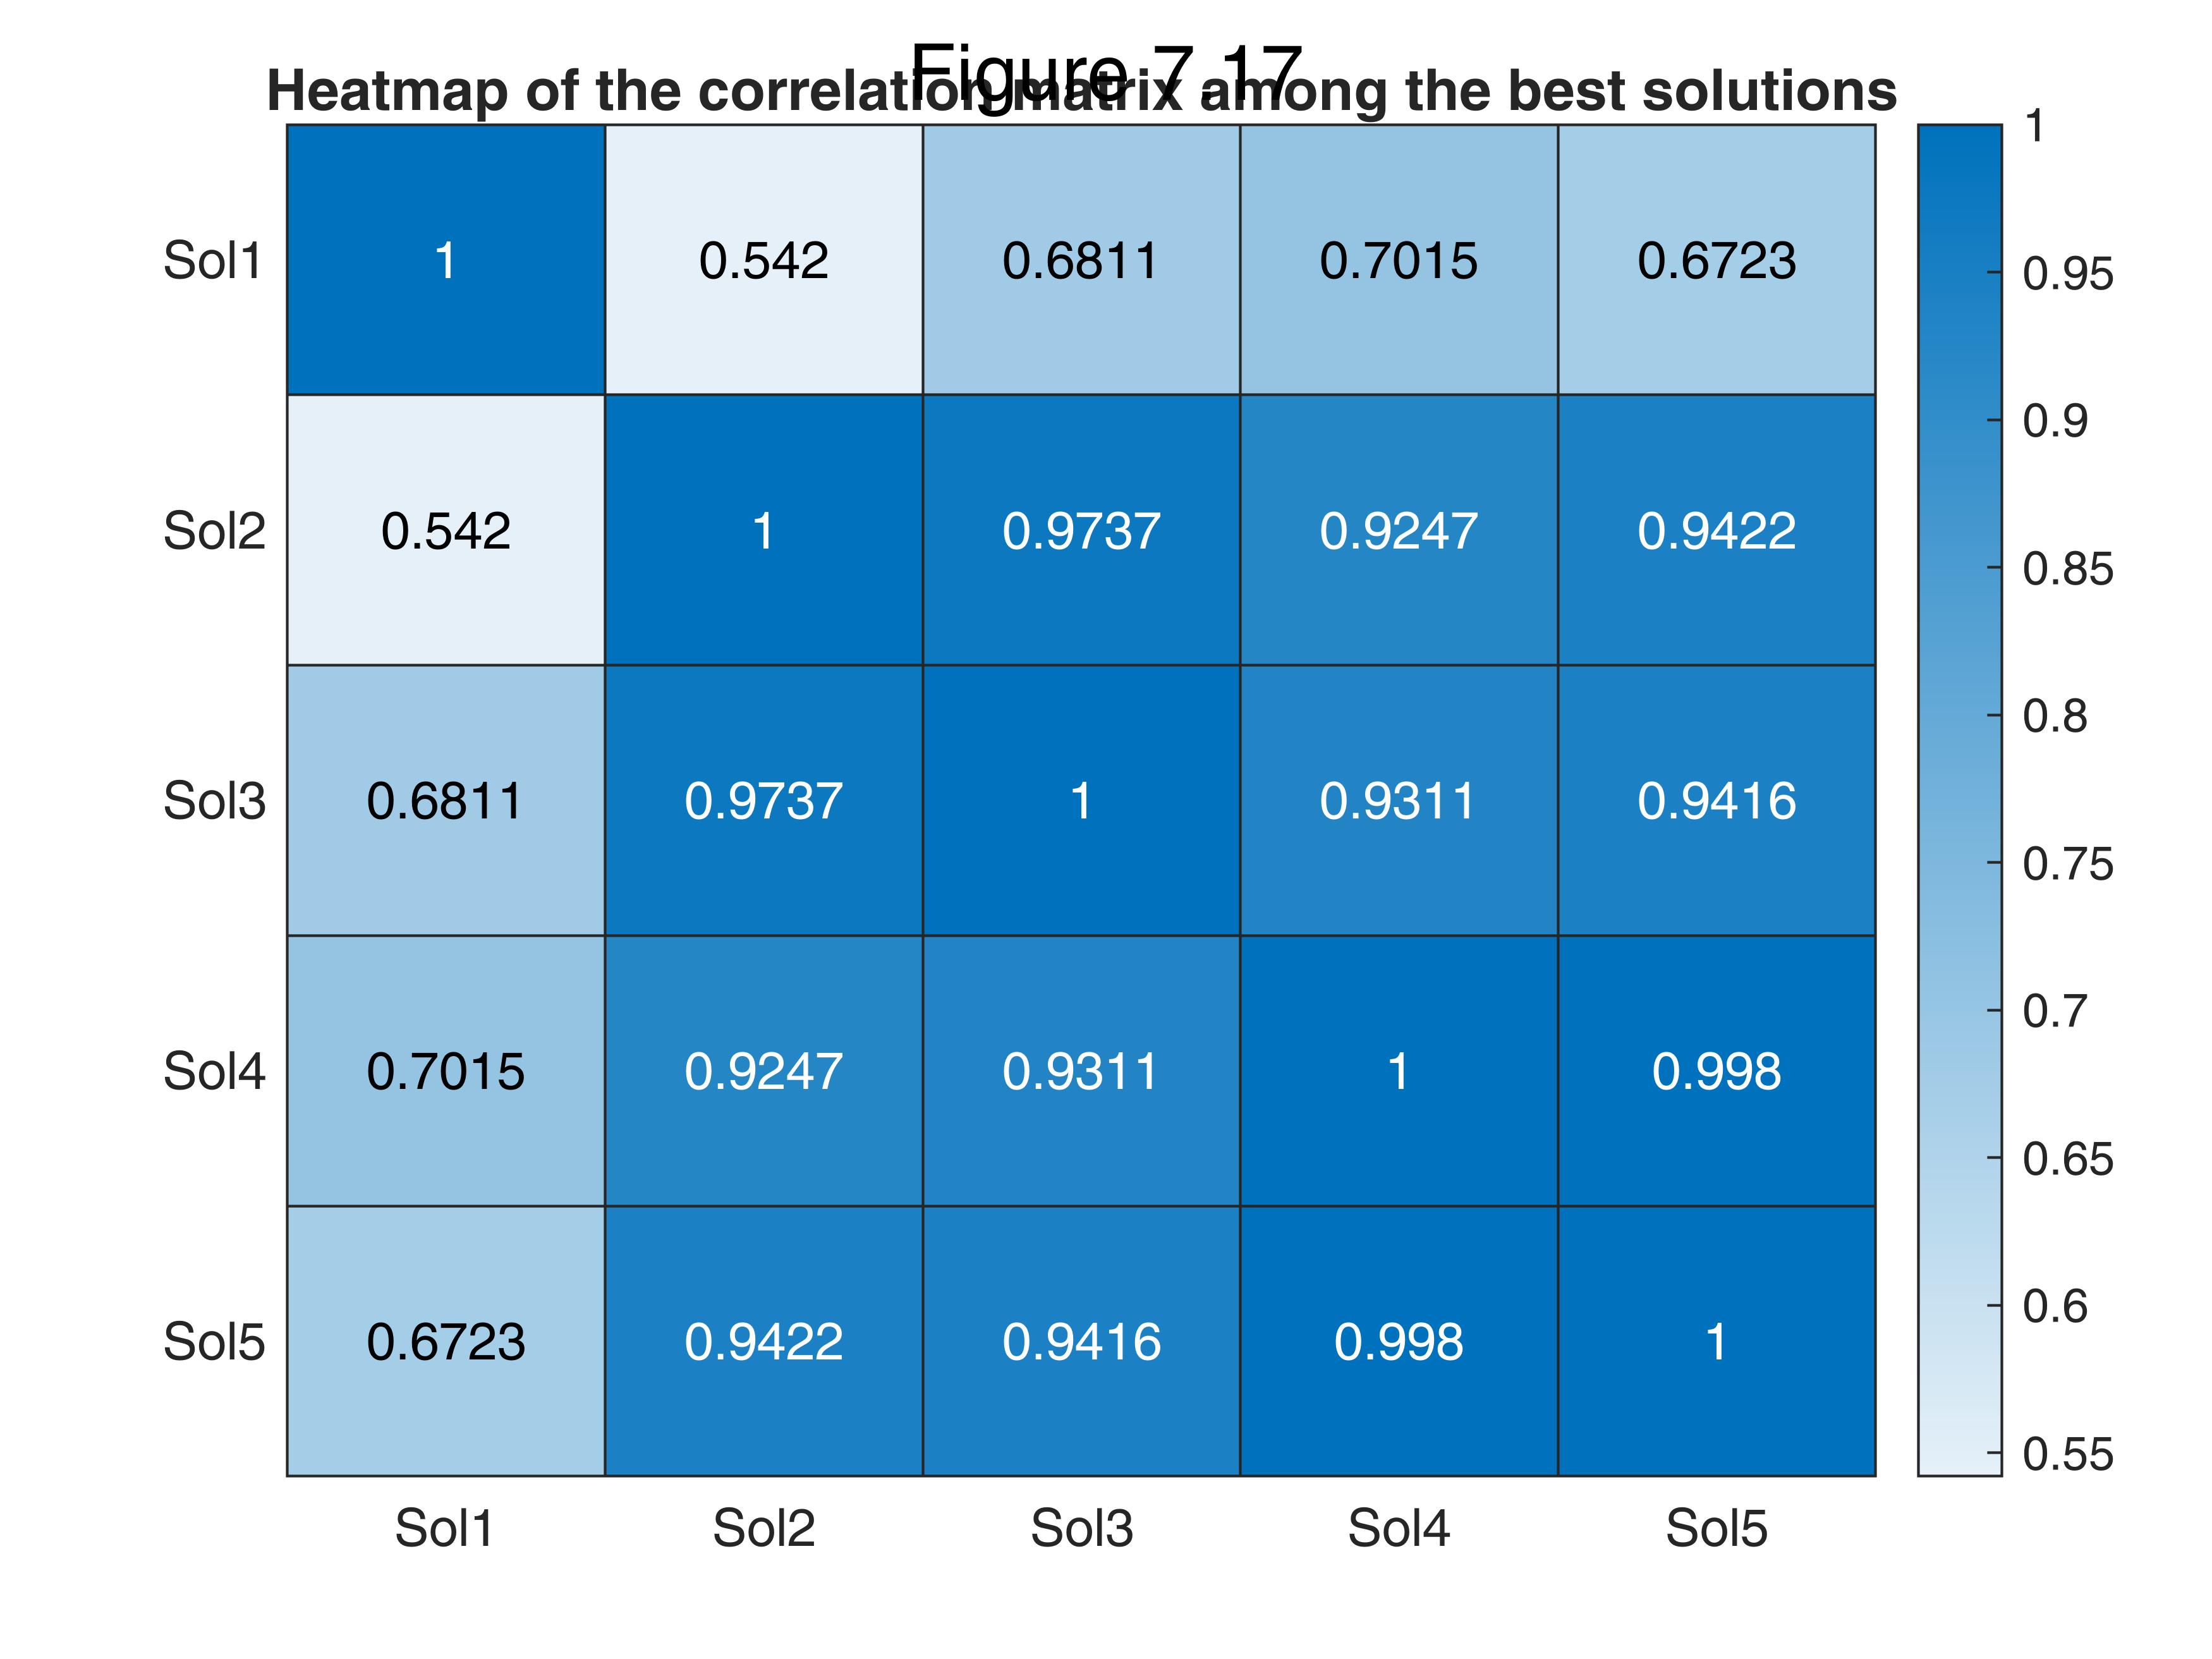

In [5]:

pl_heatmap=findobj(0, 'type', 'figure','tag', 'pl_heatmap');
figure(pl_heatmap(1))

if prin==1
    % print to postscript
    print -depsc figs\F1.eps;
    print -depsc figs\F1bis.eps;
else
    sgtitle('Figure 7.17')
    set(gcf,"Name",'Figure 7.17')
end

## Create Figure 7.18 (extract best solution)


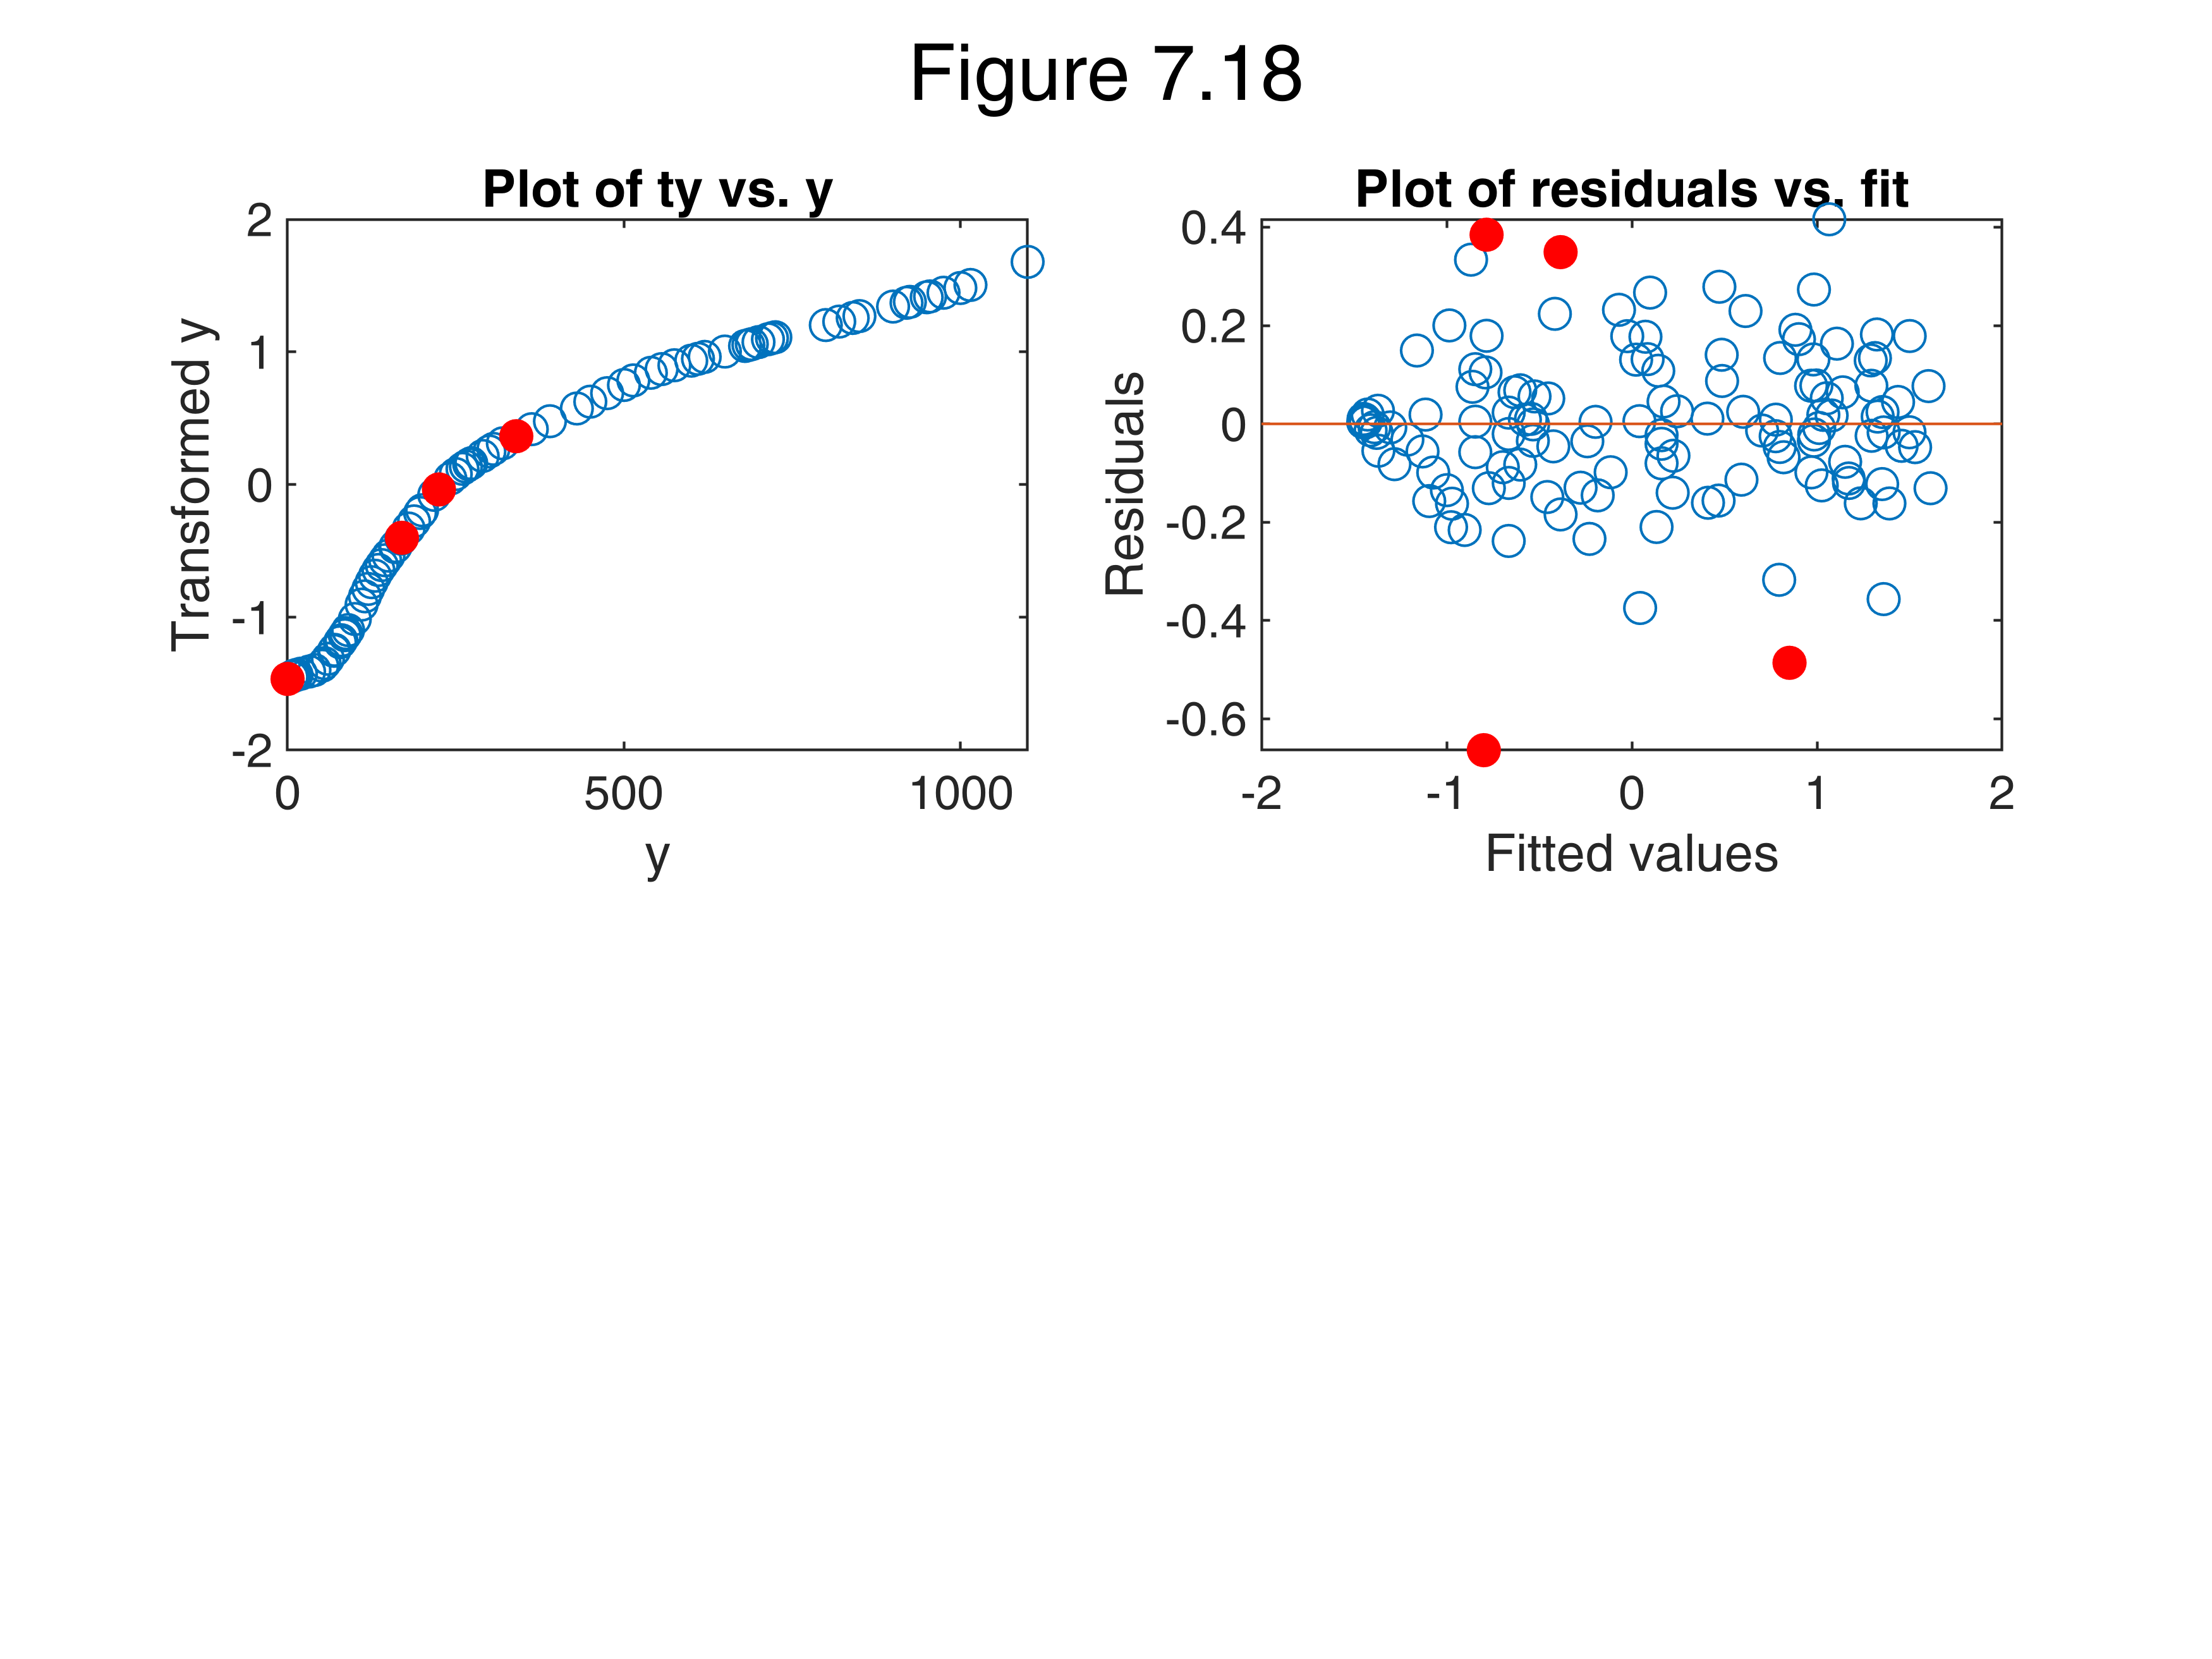

In [6]:
j=1;
outj=VALtfin{j,"Out"};
out=outj{:};
aceplot(out,'tyFitted',false,'oneplot',[])

if prin==1
    % print to postscript
    print -depsc figs\F2.eps;
    %  print -depsc figs\F3.eps;
else
    sgtitle('Figure 7.18')
    set(gcf,"Name",'Figure 7.18')
end

In [7]:
disp(['Number of outliers by first solution=' num2str(length(out.outliers))])

Number of outliers by first solution=4

In [8]:

ytra=out.ty;
Listout=out.outliers;

## FISH JUST one expl

In [9]:
[VALtfin,CorrMat]=avasms(y,X(:,1),'l',3,'plots',0);
j=1;
outj=VALtfin{j,"Out"};
out=outj{:};
disp(out)

           y: [142x1 double]
          ty: [142x1 double]
           X: [142x1 double]
          tX: [142x1 double]
         rsq: 0.9803
       niter: 3
    outliers: 41
      pvaldw: 0.8732
      pvaljb: 0.5000

In [10]:
ytrajust1=out.ty;
Listoutjust1=out.outliers;

## Create Figure 7.19

comparison of transformations (3 and 1 expl. var.)



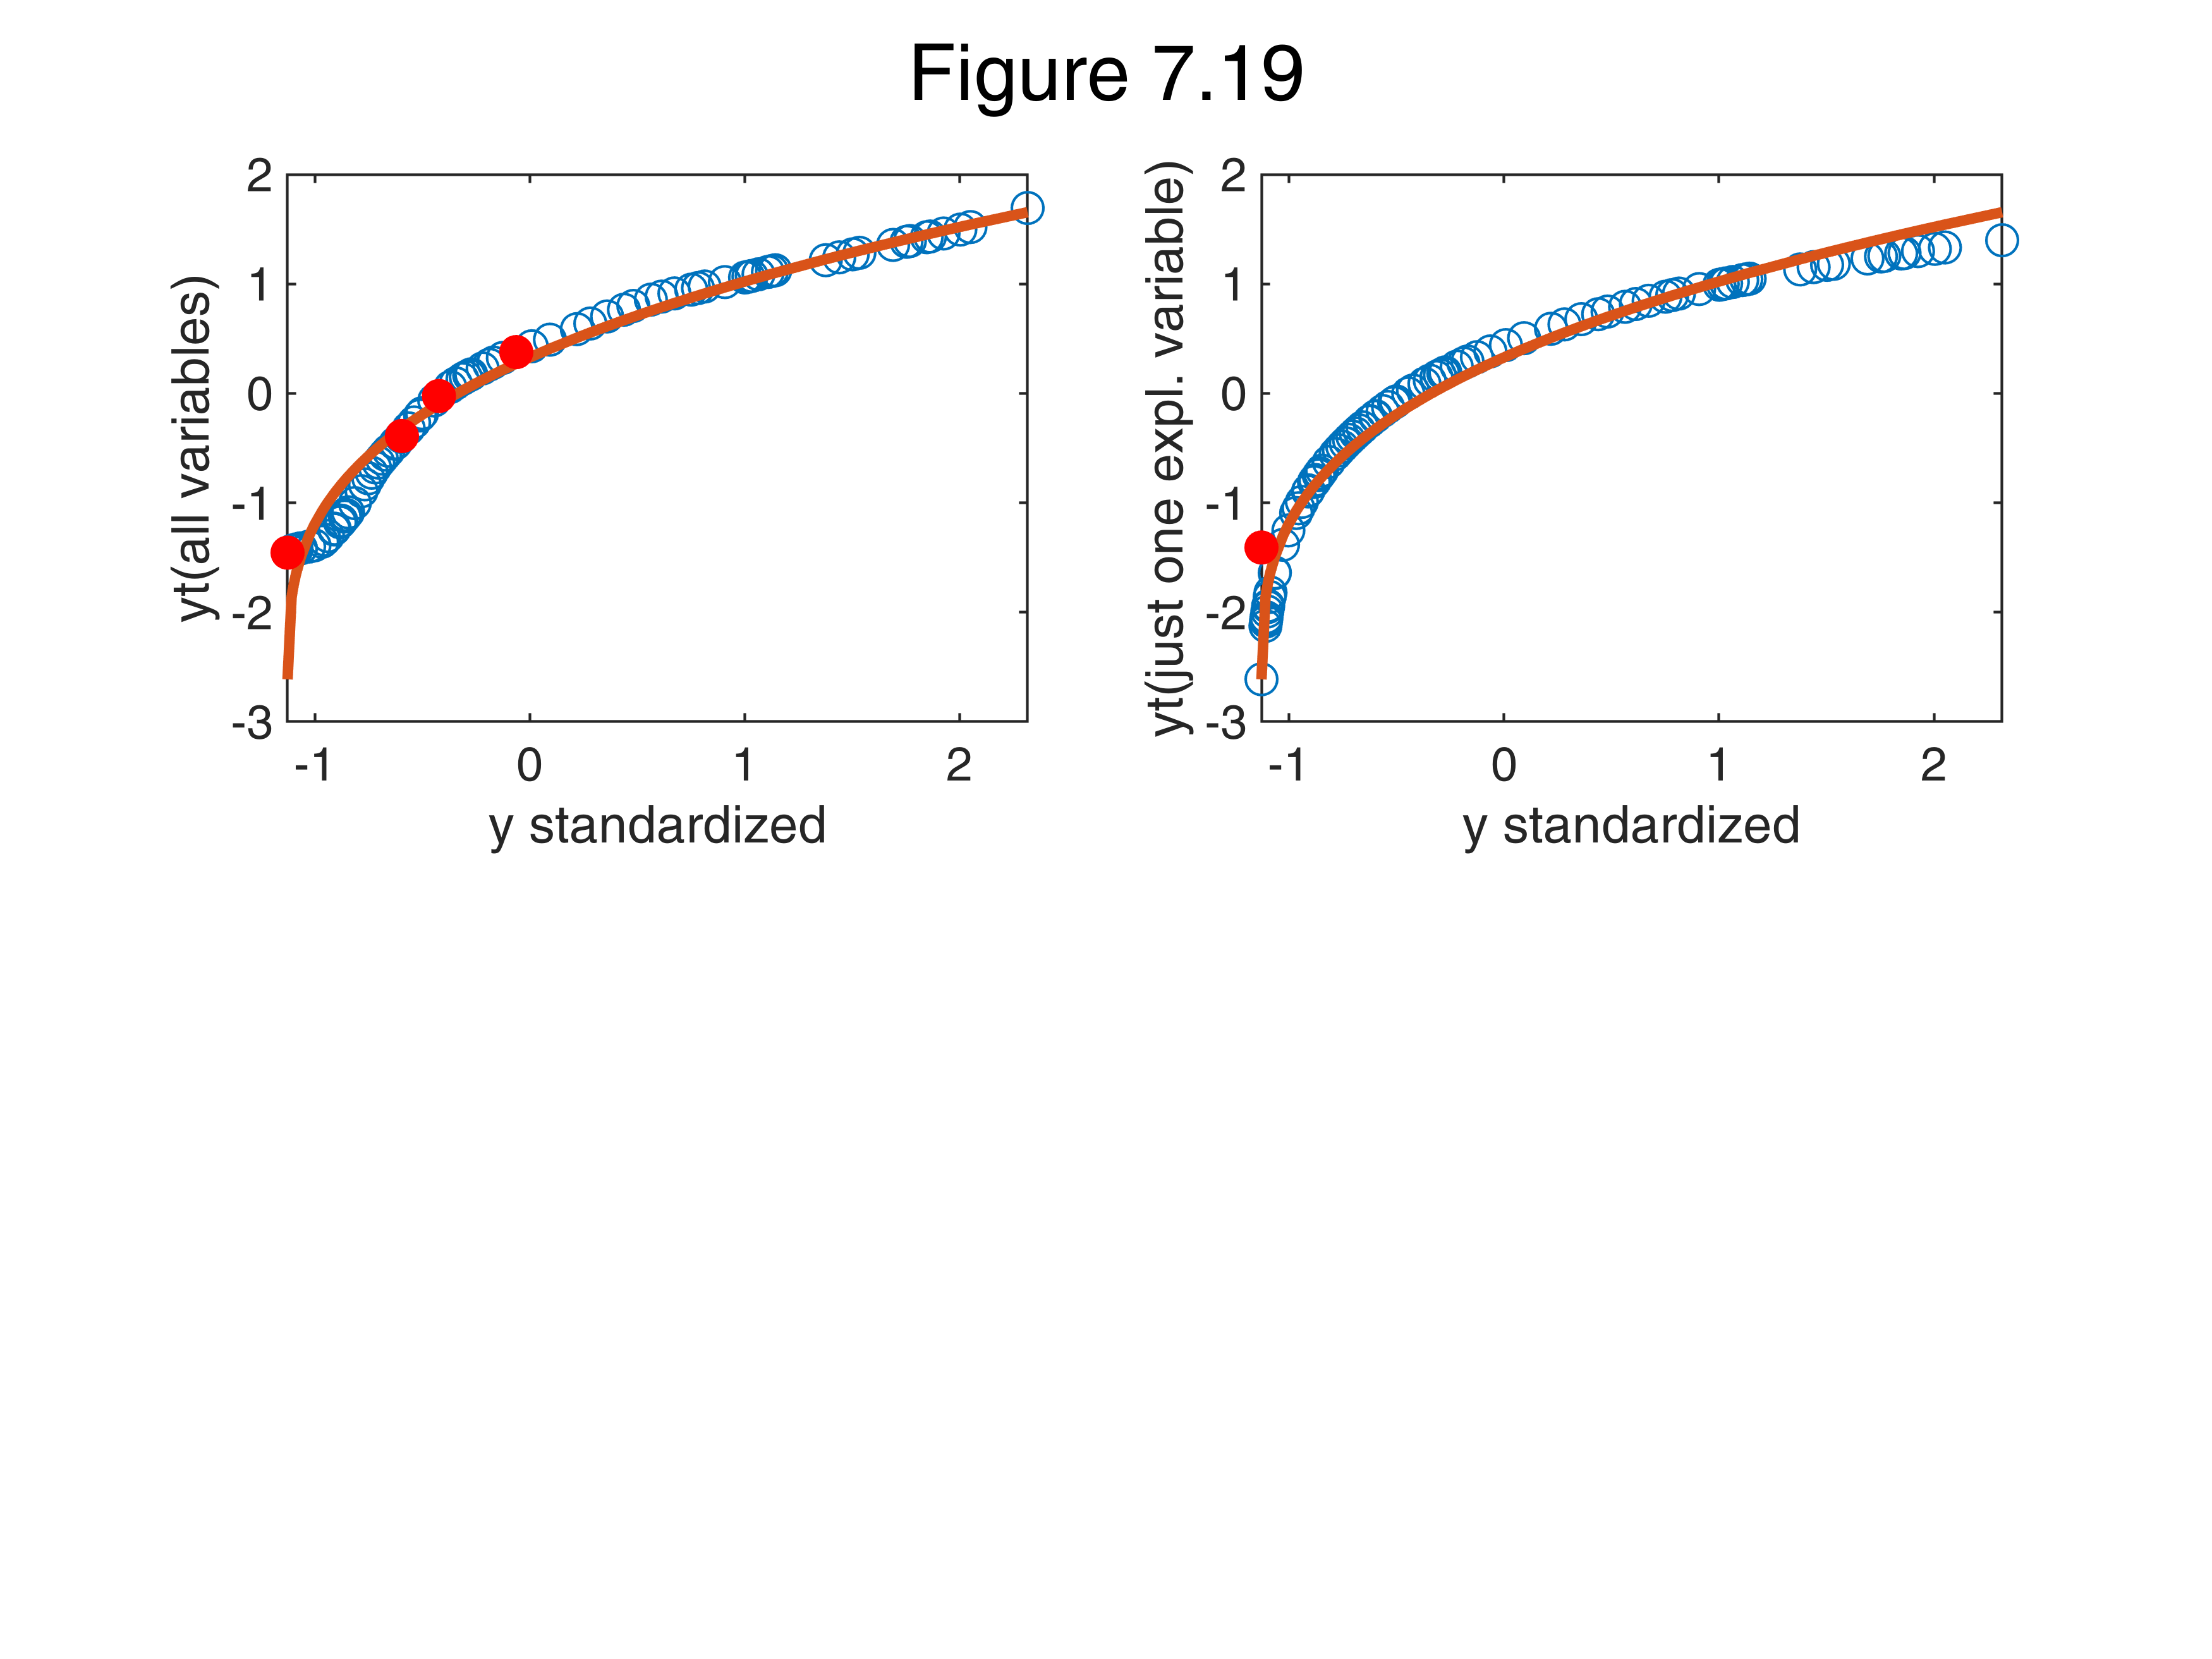

In [11]:
[~,ind]=sort(y);
figure
subplot(2,2,1)
ytheo=(y.^(1/3));
ystand=zscore(y);
ytheoz=zscore(ytheo(ind));
[ysor, ind]=sort(ystand);
[ytraz,mu,sig]=zscore(ytra(ind));
[ytrajust1z,mujust1,sigjust1]=zscore(ytrajust1(ind));

plot(ysor,ytraz,'o')
hold('on')
plot(ysor,ytheoz,'-','LineWidth',2)
plot(ystand(Listout),(ytra(Listout)-mu)/sig,'o','Color','r','MarkerFaceColor','r')
xlabel('y standardized')
ylabel('yt(all variables)')

subplot(2,2,2)
plot(ysor,ytrajust1z,'o')
hold('on')
plot(ysor,ytheoz,'-','LineWidth',2)
plot(ystand(Listoutjust1),(ytra(Listoutjust1)-mujust1)/sigjust1,'o','Color','r','MarkerFaceColor','r')
xlabel('y standardized')
ylabel('yt(just one expl. variable)')

if prin==1
    % print to postscript
    print -depsc F4.eps;
else
    sgtitle('Figure 7.19')
    set(gcf,"Name",'Figure 7.19')
end

In [12]:

% R2 using y^1/3 and deleting obs. 41
outJust1=fitlm(X(:,1),ytheo,'Exclude',41);
disp('Value of R2 in the model which just includes one expl. var.')

Value of R2 in the model which just includes one expl. var.

In [13]:
disp(outJust1.Rsquared)

    Ordinary: 0.9685
    Adjusted: 0.9682

In [14]:

%InsideREADME